### Generating a signal dataset

In [1]:
from synthesis import get_generator

generator = get_generator()
signals = generator.generate_dataset()
print('Default size: ', signals.shape)

# custom params
params = {
    "num_signals": 50,
}

generator = get_generator(**params)
signals = generator.generate_dataset()
print('Custom size: ', signals.shape)

Generated signal 100/500
Generated signal 200/500
Generated signal 300/500
Generated signal 400/500
Generated signal 500/500
Default size:  (500, 2, 1000)
Custom size:  (50, 2, 1000)


### Using the original algorithm

In [2]:
# signals = generator.generate_dataset(use_original_algorithm=True)

### Use random state

In [3]:
import numpy as np

# fully random generator
generator = get_generator(random_state=None) # default value
signals_a = generator.generate_dataset()
signals_b = generator.generate_dataset()
print('First signals are the same: ', np.all(signals_a == signals_b))

# random generator with a fixed seed
generator = get_generator(random_state=42)
signals_a = generator.generate_dataset()
signals_b = generator.generate_dataset()
print('Second signals are the same: ', np.all(signals_a == signals_b))

Generated signal 100/500
Generated signal 200/500
Generated signal 300/500
Generated signal 400/500
Generated signal 500/500
Generated signal 100/500
Generated signal 200/500
Generated signal 300/500
Generated signal 400/500
Generated signal 500/500
First signals are the same:  False
Generated signal 100/500
Generated signal 200/500
Generated signal 300/500
Generated signal 400/500
Generated signal 500/500
Generated signal 100/500
Generated signal 200/500
Generated signal 300/500
Generated signal 400/500
Generated signal 500/500
Second signals are the same:  True


### Write and read CSV

Writing alone takes about 25mins for 500k signals, I don't recommend using it.

In [4]:
from synthesis.csv_functions import save_to_csv, load_from_csv

# save
save_to_csv(signals, "signals.csv")

# load
import_signals = load_from_csv("signals.csv")

### Plot a signal

<b>Old generator</b>

/Users/matsspolgen/Documents/uni/researchProject/WaveDecomposition/synthesis/plotting.py:13: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.5)


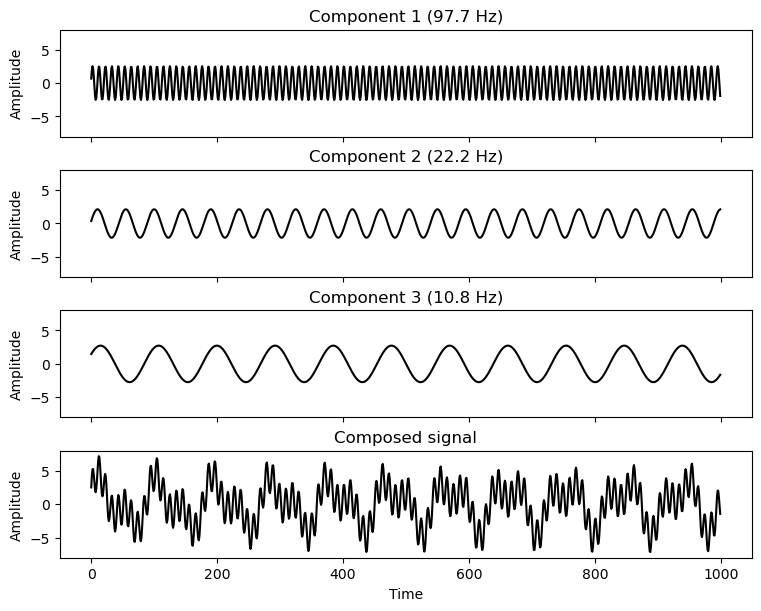

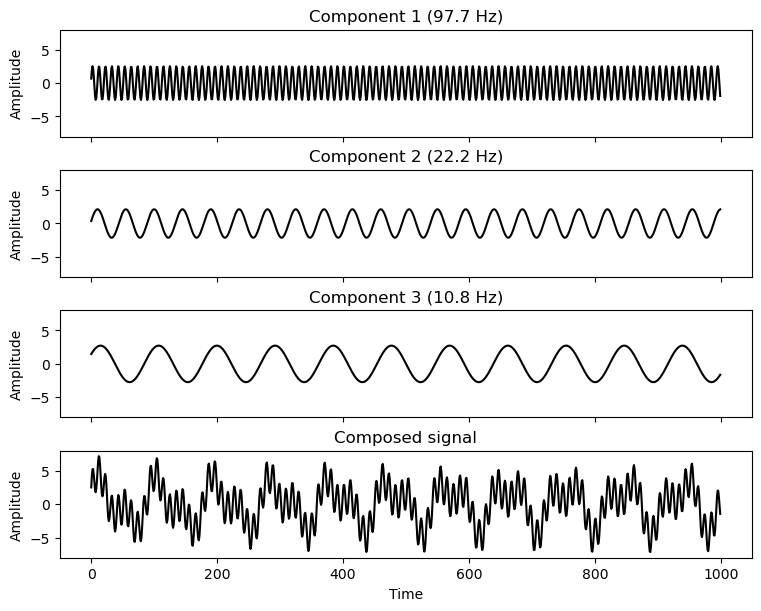

In [5]:
from synthesis.plotting import plot_signal

signal = generator.get_decomposed_signal()
plot_signal(signal)

<b>New Generator</b>

- Narrow frequencies are combined into a single component
- Intermittent components were added

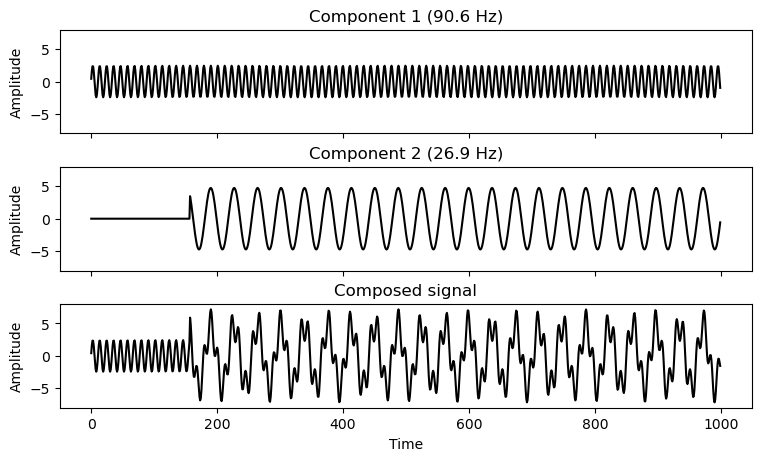

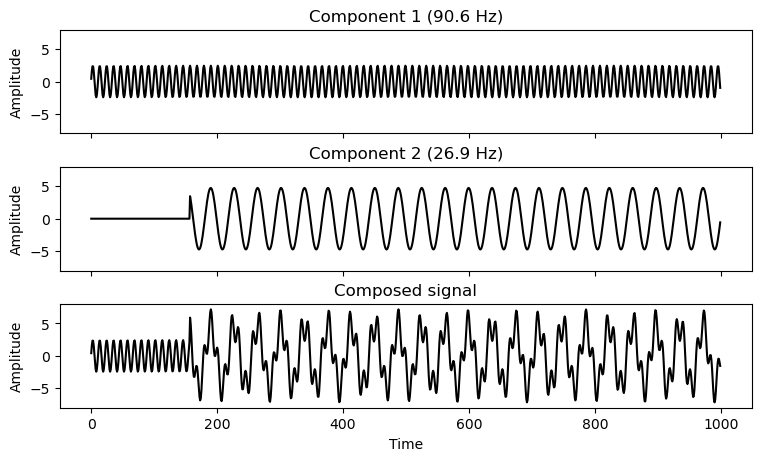

In [6]:
signal = generator.get_decomposed_signal_improved()
plot_signal(signal)

### SSD

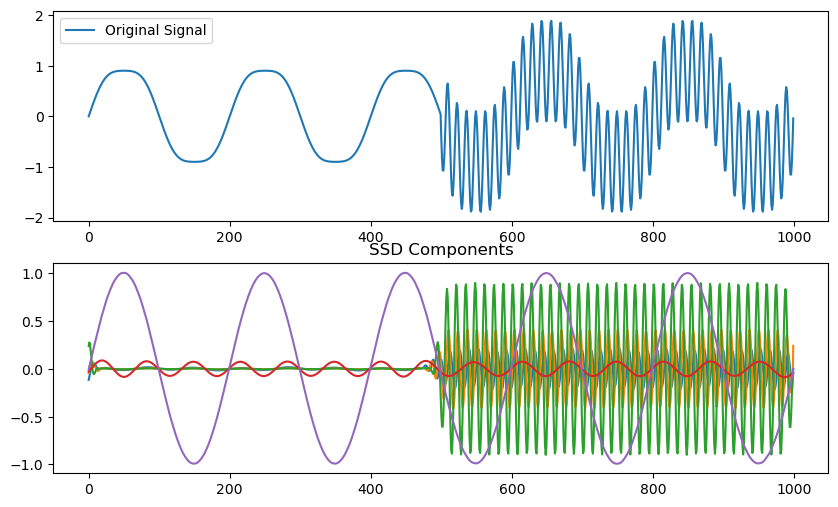

In [7]:
from SSD import SSD
import matplotlib.pyplot as plt
import numpy as np

# Example signal creation
y = np.sin(2 * np.pi * 5 * np.arange(1000) / 1000)
y2 = 0.1 * np.sin(2 * np.pi * 15 * np.arange(1000) / 1000)
y3 = y + y2
y3[499:999] = y3[499:999] + np.sin(2 * np.pi * 75 * np.arange(500, 1000) / 1000)

x1 = np.sin(2 * np.pi * 5 * np.arange(1000) / 1000)
x2 = np.concatenate([np.zeros(500), np.sin(2 * np.pi * 75 * np.arange(500, 1000) / 1000)])
x3 = 0.1 * np.sin(2 * np.pi * 15 * np.arange(1000) / 1000)

v = y3

# Sampling frequency 1000 and threshold of 0.005
SSDcomponents = SSD(v, 1000, 0.005)

# Plot original and decomposed signals
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(v, label='Original Signal')
plt.legend()
plt.subplot(212)
plt.plot(SSDcomponents.T)
plt.title('SSD Components')
plt.show()

### Updated Params

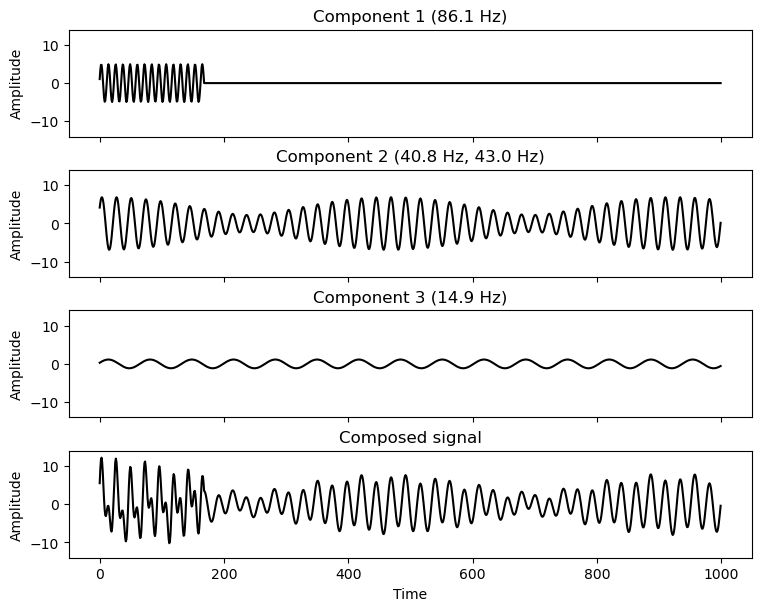

In [26]:
params = {
    "num_signals": 50,
    "num_components_range": (3, 4),
    "num_data_points": 1000,
    "random_state": None,
    "sampling_freq": 1000,
    "freq_range": (2, 100),
    "amplitude_range": (1, 5),
    "phase_range": (0, 1),
    "intermittent_prob": 0.33,
    "combined_prob": 0.33,
    "allow_multiple_intermittent": False,
    "allow_multiple_combined": False,
}

new_generator = get_generator(**params)
dataset = new_generator.generate_dataset()
signal = new_generator.get_decomposed_signal_improved()
plot_signal(signal)
plt.savefig('example_signal.svg', format='svg', dpi=1200)